# Gaussian Processes with Spectral Mixture Kernels to Implicitly Capture Hidden Structure from Data 
---------------------------------------------------------------------------------------------------

**(Note: Cross-posted with the [Haystax Technology Blog](https://wp.me/p7rVtH-1Fv).)**

Several scientific fields such as insider-threat detection, highway-safety planning, often lack sufficient amounts of time-series training data for the purpose of scientific discovery. Moreover, the available limited data are quite noisy. For instance Greitzer and Ferryman (2013) state that ”ground truth” data on actual insider behavior is typically either not available or is limited. In some cases, one might acquire real data, but for privacy reasons, there is no attribution of any individuals relating to abuses or offenses i.e., there is no ground truth. The data may contain insider threats, but these are not identified or knowable to the researcher (Greitzer and Ferryman, 2013; Gheyas and Abdallah, 2016).In highway-safety
planning, Veeramisti (2016) mentions that Departments of Transportation (DOTs) only recently started collecting monthly highway-crash data because of the high cost and extensive process of collecting the required data.

## The Problem
Having limited and quite noisy data for insider-threat detection and highway-safety planning presents a major challenge when estimating time-series models that are robust to overfitting and have well-calibrated uncertainty estimates. Most of the current literature in time-series modeling in these scientific fields is associated with two major limitations.

First, the methods involve visualizing the time series for noticeable structure and patterns such as periodicity, smoothness, growing/decreasing trends and then hard-coding these patterns into the statistical models during formulation. This approach is suitable for large datasets where more data typically provides more information to learn expressive structure. Given limited amounts of data, such expressive structure may not be easily noticeable. For instance, the figure below shows monthly attachment size in emails (in Gigabytes) sent by an insider from their employee account to their home account. Trends such as periodicity, smoothness, growing/decreasing trends are not easily noticeable.

<img src="https://github.com/Emaasit/long-range-extrapolation/blob/dev/blog/data-emails.png?raw=true" width="600" height="200" />

Second, most of the current literature focuses on parametric models that impose strong restrictive assumptions by pre-specifying the functional form and number of parameters. Pre-specifying a functional form for a time-series model could lead to either overly complex model specifications or simplistic models. It is difficult to know *a priori* the most appropriate function to use for modeling sophisticated insider-threat behavior or highway-crash scenarios that involve complex hidden patterns and many other influencing factors.

### Source code
For the impatient reader, two options are provided below to access the source code used for empirical analyses:

1. The entire project (code, notebooks, data, and results) can be found [here on GitHub](https://github.com/Emaasit/long-range-extrapolation).

2. Click the binder icon below to open the notebooks in a web browser and explore the entire project without downloading and installing any software.

 [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Emaasit/long-range-extrapolation/master?urlpath=lab)

## Data Science Questions
Given the above limitations in the current state-of-art, this study formulated the following three Data Science questions. Given limited and quite noisy time-series data for insider-threat detection and highway-safety planning, is it possible to perform:

1. pattern discovery without hard-coding trends into statistical models during formulation?

2. model estimation that precludes pre-specifying a functional form?

3. model estimation that is robust to overfitting and has well-calibrated uncertainty estimates? 

## Hypothesis
To answer these three Data Science questions and address the above-described limitations, this study formulated the following hypothesis:
<blockquote>This study hypothesizes that by leveraging current state-of-the-art innovations in nonparametric Bayesian methods, such as Gaussian processes with spectral mixture kernels, it is possible to perform pattern discovery without prespecifying functional forms and hard-coding trends into statistical models.</blockquote>

## Methodology
To test the above hypothesis, a nonparametric Bayesian approach was proposed to implicitly capture hidden structure from time series having limited data. The proposed model, a Gaussian process with a spectral mixture kernel, precludes the need to pre-specify a functional form and hard code trends, is robust to overfitting and has well-calibrated uncertainty estimates.

Mathematical details of the proposed model formulation are described in a corresponding paper that can be found on arXiv through the link below:

* Emaasit, D. and Johnson, M. (2018). [Capturing Structure Implicitly from Noisy Time-Series having Limited Data](https://arxiv.org/abs/1803.05867). arXiv preprint arXiv:1803.05867.

A Brief description of the fundamental concepts of the proposed methodology is as follows. Consider for each data point, $i$, that $y_i$ represents the attachment size in emails sent by an insider to their home account and $x_i$ is a temporal covariate such as month. The task is to estimate a latent function $f$, which maps input data, $x_i$, to output data $y_i$ for $i$ = 1, 2, $\ldots{}$, $N$, where $N$ is the total number of data points. Each of the input data $x_i$ is of a single dimension $D = 1$, and $\textbf{X}$ is a $N$ x $D$ matrix with rows $x_i$.

<img class="size-medium wp-image-6429 aligncenter" src="http://haystax.com/wp-content/uploads/2018/03/gp-pgm-352x300.png" alt="" width="352" height="200" />

The observations are assumed to satisfy:
\begin{equation}\label{eqn:additivenoise}
y_i = f(x_i) + \varepsilon, \quad where \, \, \varepsilon \sim \mathcal{N}(0, \sigma_{\varepsilon}^2)
\end{equation}

The noise term, $\varepsilon$, is assumed to be normally distributed with a zero mean and variance, $\sigma_{\varepsilon}^2$. Latent function $f$ represents hidden underlying trends that produced the observed time-series data.

Given that it is difficult to know $\textit{a priori}$ the most appropriate functional form to use for $f$, a prior distribution, $p(\textbf{f})$, over an infinite number of possible functions of interest is formulated. A natural prior over an infinite space of functions is a Gaussian process prior (Williams and Rasmussen, 2006). A GP is fully parameterized by a mean function, $\textbf{m}$, and covariance function, $\textbf{K}_{N,N}$, denoted as:
\begin{equation}\label{eqn:gpsim}
\textbf{f} \sim \mathcal{GP}(\textbf{m}, \textbf{K}_{N,N}),
\end{equation}

The posterior distribution over the unknown function evaluations, $\textbf{f}$, at all data points, $x_i$, was estimated using Bayes theorem as follows:

\begin{equation}\label{eqn:bayesinfty}
\begin{aligned}
p(\textbf{f} \mid \textbf{y},\textbf{X}) &= \frac{p(\textbf{y} \mid \textbf{f}, \textbf{X}) \, p(\textbf{f})}{p(\textbf{y} \mid \textbf{X})}, \\
&= \frac{p(\textbf{y} \mid \textbf{f}, \textbf{X}) \, \mathcal{N}(\textbf{f} \mid \textbf{m}, \textbf{K}_{N,N})}{p(\textbf{y} \mid \textbf{X})},
\end{aligned}
\end{equation}

where:

\begin{aligned}
p(\textbf{f}\mid \textbf{y},\textbf{X}) &= \text{the posterior distribution of functions that best explain the response variable, given the covariates} \\
p(\textbf{y} \mid \textbf{f}, \textbf{X}) &= \text{the likelihood of response variable, given the functions and covariates} \\ 
p(\textbf{f}) &= \text{the prior over all possible functions of the response variable} \\
p(\textbf{y} \mid \textbf{X}) &= \text{the data (constant)}
\end{aligned}

A spectral mixture kernel was proposed for the covariance function, $\textbf{K}_{N,N}$. The resulting posterior, $p(\textbf{f}\mid \textbf{y},\textbf{X})$ is a Gaussian process composed of a distribution of possible functions that best explain the time-series pattern.

## Experiments

### The setup
Let's first install some python packages that we shall use for our analysis. Also we shall set up our plotting requirements.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook', font_scale = 1.1)
np.random.seed(12345)
rc = {'xtick.labelsize': 40, 'ytick.labelsize': 40, 'axes.labelsize': 40, 'font.size': 40, 'lines.linewidth': 4.0, 
      'lines.markersize': 40, 'font.family': "serif", 'font.serif': "cm", 'savefig.dpi': 200,
      'text.usetex': False, 'legend.fontsize': 40.0, 'axes.titlesize': 40, "figure.figsize": [24, 16]}
sns.set(rc = rc)
sns.set_style("darkgrid")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import gpflow

/Users/demaasit/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Raw data and sample formation
The insider-threat data used for empirical analysis in this study was provided by the computer emergency response team (CERT) division of the software engineering institute (SEI) at Carnegie Mellon University. The particular insider threat focused on is the case where a known insider sent information as email attachments from their work email to their home email.

First, let's read in the data using `pandas`, view the first three records and the structure of the resulting `pandas` dataframe.

In [2]:
email_filtered = pd.read_csv("../data/emails/email_filtered.csv", parse_dates=["date"])
email_filtered.head(n = 3)

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{D0V4-N9KM15BF-0512LLVP},2010-01-04 07:36:48,BTR2026,PC-9562,Thaddeus.Brett.Daniel@dtaa.com,Zorita.Angela.Wilson@dtaa.com,NaN,Beau.Todd.Romero@dtaa.com,Send,23179,NaN,"On November 25, general Savary was sent to the..."
1,{L5E5-J1HB80OY-9539AOEC},2010-01-04 07:38:18,BTR2026,PC-9562,Beau.Todd.Romero@dtaa.com,NaN,NaN,Marsh_Travis@raytheon.com,View,17047,NaN,"Early in the morning of May 27, a boat crossed..."
2,{Q4V7-V6BR00TZ-5209UVDX},2010-01-04 07:53:35,BTR2026,PC-9562,Bianca-Clark@optonline.net,NaN,NaN,Beau_Romero@aol.com,Send,26507,NaN,The Americans never held up their side of the ...


Our `pandas` dataframe comprises columns that we are interested in such as "user" (username), "date", "to" (the recipient email address) and "size" (attachment size) of emails.

In [3]:
email_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11920 entries, 0 to 11919
Data columns (total 12 columns):
id             11920 non-null object
date           11920 non-null datetime64[ns]
user           11920 non-null object
pc             11920 non-null object
to             11920 non-null object
cc             6101 non-null object
bcc            593 non-null object
from           11920 non-null object
activity       11920 non-null object
size           11920 non-null int64
attachments    3809 non-null object
content        11920 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.1+ MB


Let's filter data for a particular known insider with user ID "CDE1846" and summarize the total attachment size of emails by month. This results into 17 data points ranging from January 2010 to May 2011.

In [4]:
df_insider = email_filtered[email_filtered["user"] == "CDE1846"]
emails_per_month = df_insider.resample(rule = "1M", on = "date").sum().reset_index()
emails_per_month["date"] = pd.to_datetime(emails_per_month["date"], format = "%Y-%m-%d")
emails_per_month.columns = ["ds", "y"]
emails_per_month.y = emails_per_month.y/1e6
emails_per_month["ds"] = emails_per_month["ds"].apply(lambda x: x.strftime('%Y-%m')).astype(str)
emails_per_month

,ds,y
0,2010-01,117.809274
1,2010-02,112.461320
2,2010-03,134.592245
3,2010-04,148.911866
4,2010-05,80.689085
5,2010-06,128.024029
6,2010-07,115.046041
7,2010-08,142.607937
8,2010-09,121.728119
9,2010-10,126.041467


Let's visualize this data using `matplotlib` and `seaborn`. The resulting figure shows no interesting insights just yet.

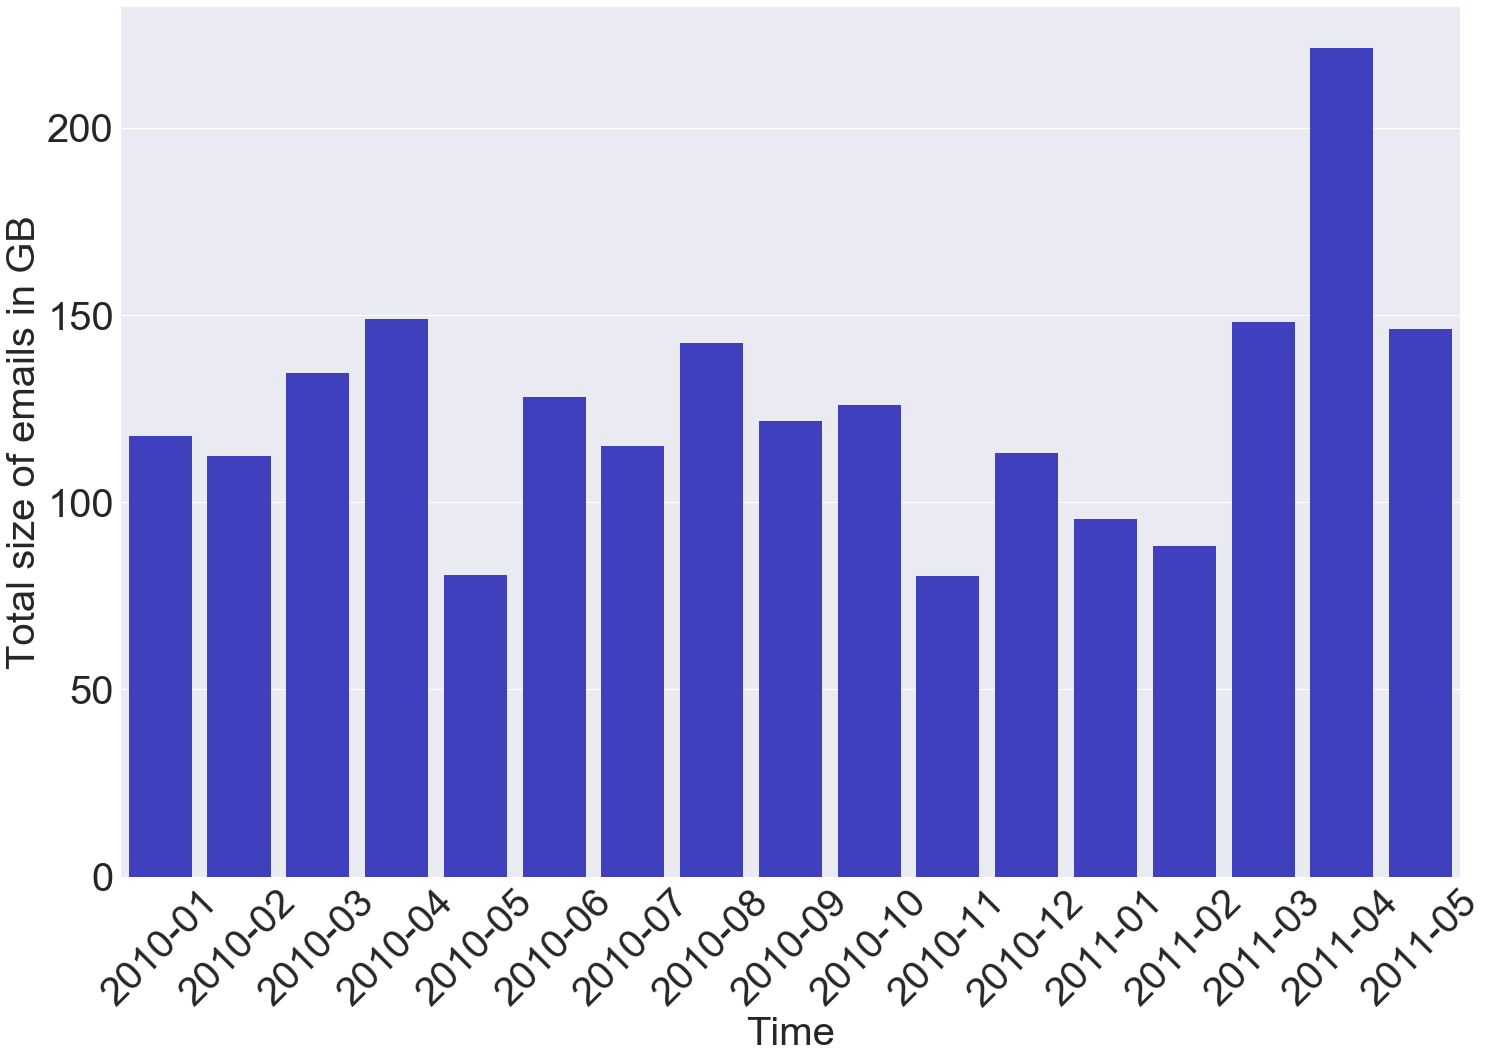

In [5]:
fig, ax = plt.subplots()
sns.barplot(data = emails_per_month, x = "ds", y = "y", color = "blue", saturation = .5)
ax.set_xticklabels(labels = emails_per_month.ds, rotation = 45)
ax.set_xlabel('Time')
ax.set_ylabel('Total size of emails in GB');

Now let's look at the case where the insider sent email IP from their employee account to their home account. Visualizing this data shows some interesting trends towards the end of the analysis period. The attachment size increases drastically in March and April of 2011.

In [6]:
df_insider_non_org = df_insider[~df_insider['to'].str.contains('dtaa.com')]
df_insider_ewing = df_insider_non_org[df_insider_non_org['to'] == 'Ewing_Carlos@comcast.net']
df = df_insider_ewing.resample('1M', on='date').sum().reset_index()
df.columns = ["ds", "y"]
df.y = df.y/1e6

In [7]:
df["ds"] = df["ds"].apply(lambda x: x.strftime('%Y-%m')).astype(str)

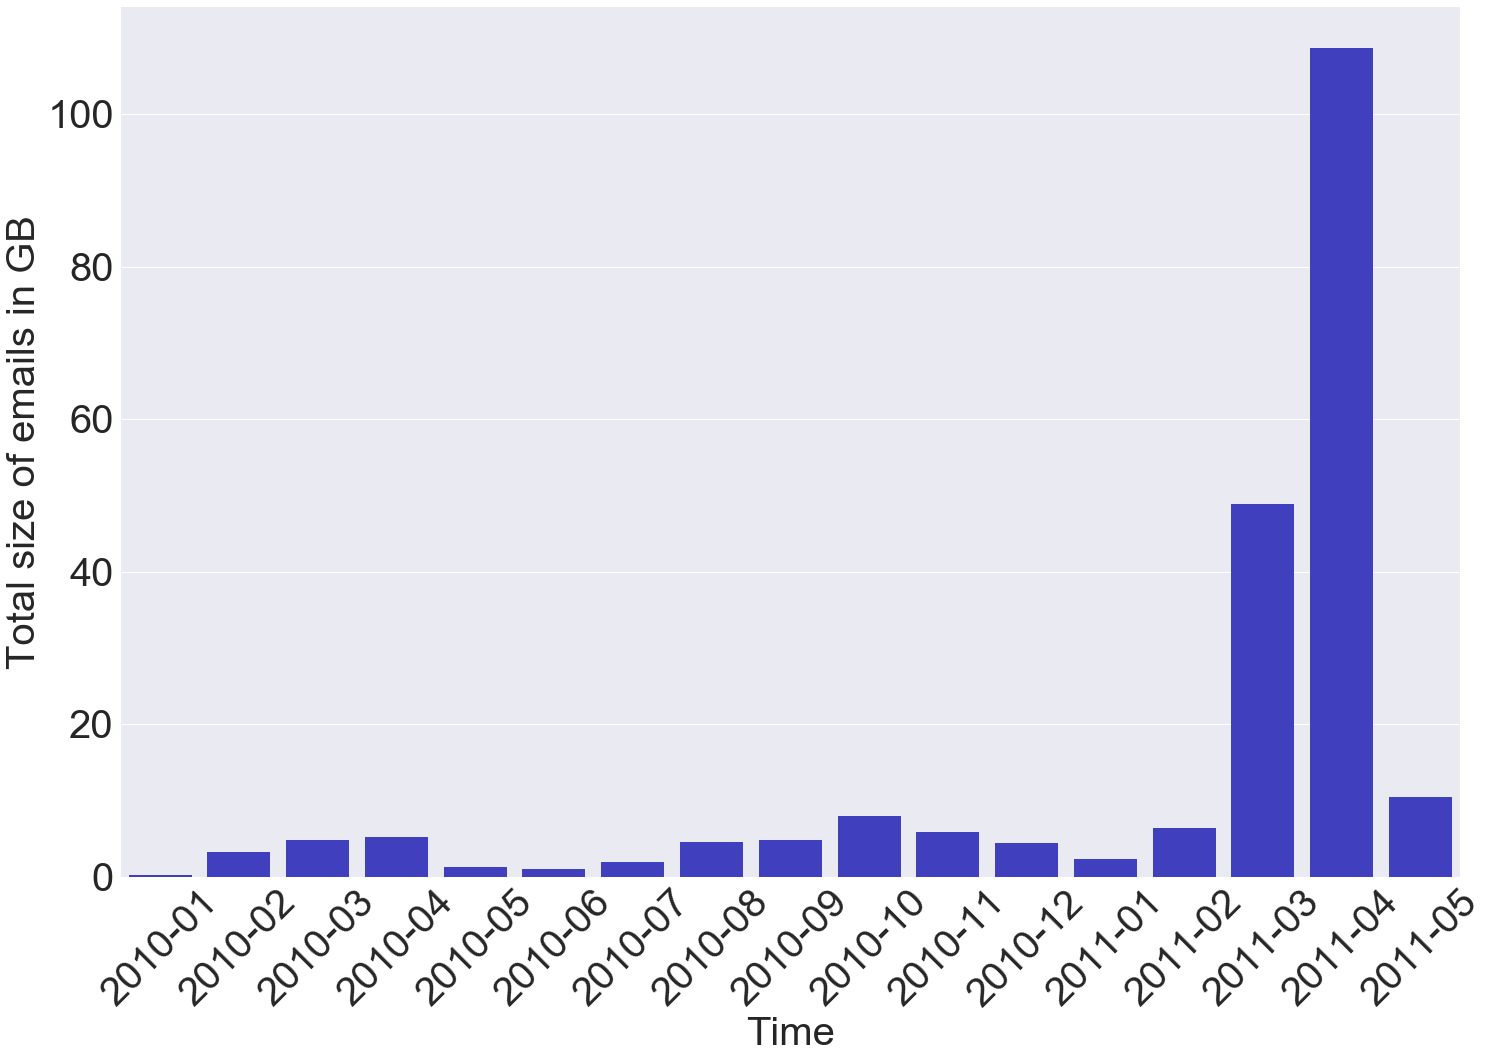

In [8]:
fig, ax = plt.subplots()
sns.barplot(data = df, x = "ds", y = "y", color = "blue", saturation = .5)
ax.set_xticklabels(labels = df.ds, rotation = 45)
ax.set_xlabel('Time')
ax.set_ylabel('Total size of emails in GB');

### Empirical analysis

Let's drop the anormalous data points from our dataframe so that we can train a model for the normal behaviour and then create a training dataset of size = 11 and remaining data our for testing the estimated model.

In [9]:
df = df.drop([14, 15, 16])
test_size = 11
X_complete = np.array([df.index]).reshape((df.shape[0], 1)).astype('float64')
X_train = X_complete[0:test_size, ]
X_test = X_complete[test_size:df.shape[0], ]
Y_complete = np.array([df.y]).reshape((df.shape[0], 1)).astype('float64')
Y_train = Y_complete[0:test_size, ]
Y_test = Y_complete[test_size:df.shape[0], ]
D = Y_train.shape[1];

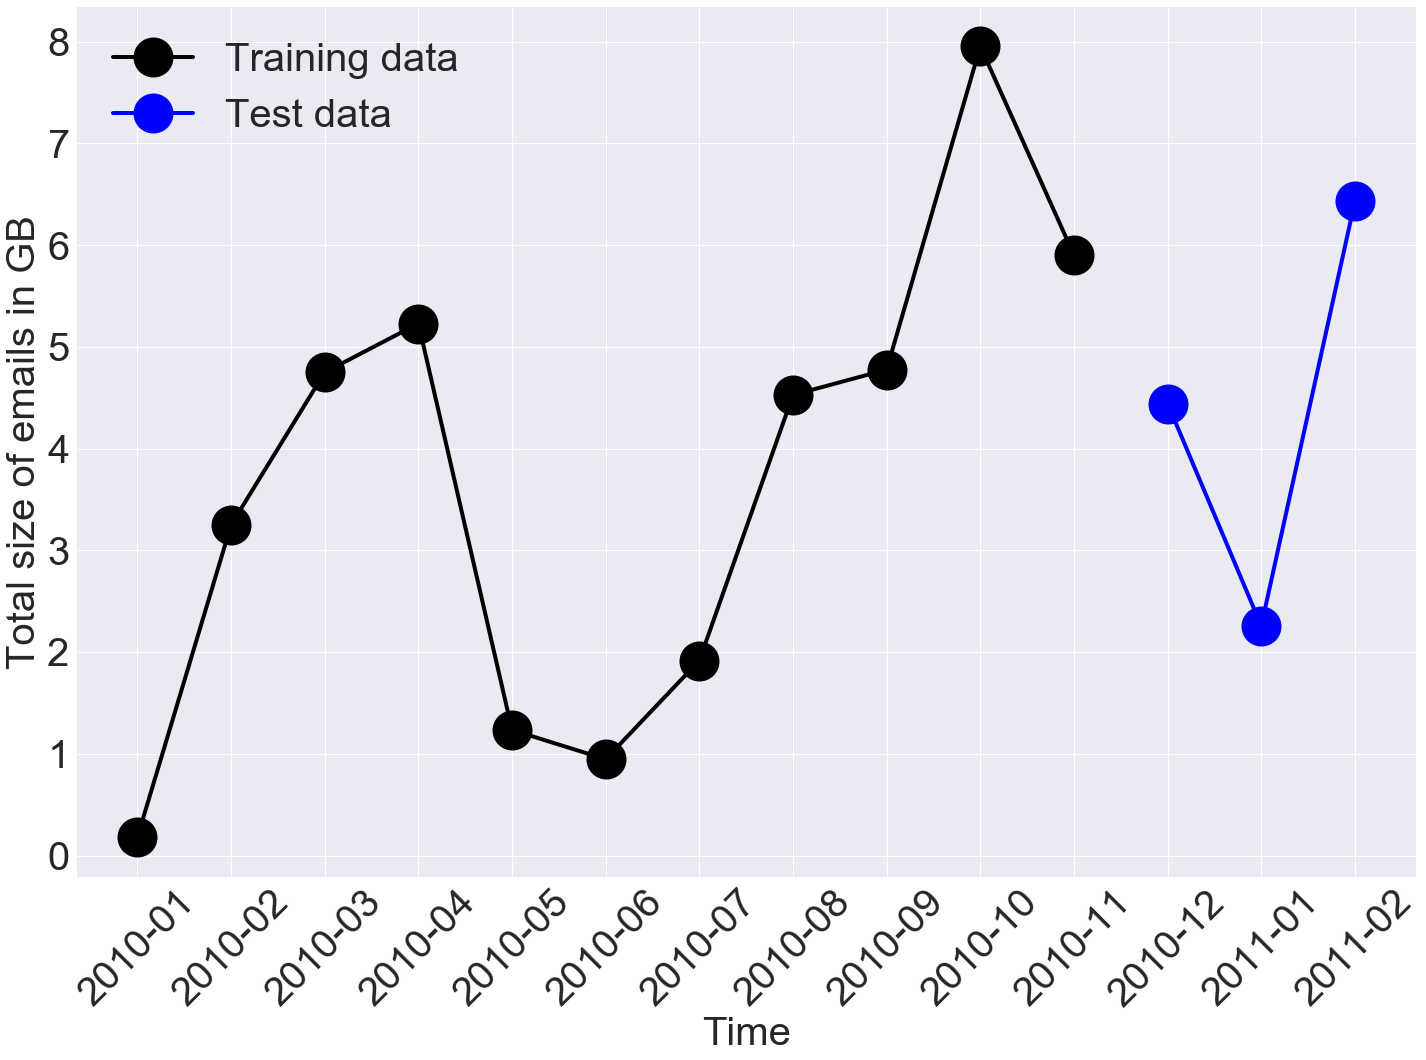

In [10]:
fig, ax = plt.subplots()
ax.plot(X_train.flatten(),Y_train.flatten(), c ='k', marker = "o", label = "Training data")
ax.plot(X_test.flatten(),Y_test.flatten(), c='b', marker = "o", label = 'Test data')
ax.set_xticks(ticks = df.index)
ax.set_xticklabels(labels = df.ds, rotation = 45)
ax.set_xlabel('Time')
ax.set_ylabel('Total size of emails in GB')
plt.legend(loc = "best");

Let's now develop a Gaussian Process model with a Spectral Mixture (SM) kernel proposed by Wilson (2014). This is because the SM kernel is capable of capturing hidden structure with data without hard cording features in a kernel. 

In [11]:
# Trains a model with a spectral mixture kernel, given an ndarray of 
# 2Q frequencies and lengthscales

Q = 10 # nr of terms in the sum
max_iters = 1000

def create_model(hypers):
    f = np.clip(hypers[:Q], 0, 5)
    weights = np.ones(Q) / Q
    lengths = hypers[Q:]

    kterms = []
    for i in range(Q):
        rbf = gpflow.kernels.RBF(D, lengthscales=lengths[i], variance=1./Q)
        rbf.lengthscales.transform = gpflow.transforms.Exp()
        cos = gpflow.kernels.Cosine(D, lengthscales=f[i])
        kterms.append(rbf * cos)

    k = np.sum(kterms) + gpflow.kernels.Linear(D) + gpflow.kernels.Bias(D)
    m = gpflow.gpr.GPR(X_train, Y_train, kern=k)
    return m

m = create_model(np.ones((2*Q,)))

Let's perfrom inference through optimization of the likelihood.

In [12]:
%%time
m.optimize(maxiter = max_iters)

CPU times: user 7.74 s, sys: 289 ms, total: 8.03 s
Wall time: 7.61 s


      fun: 20.868585670810997
 hess_inv: <43x43 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.99958679e-06,   1.41339465e-05,   5.09060783e-05,
         6.72588106e-06,  -1.28315446e-08,   1.22652879e-05,
         5.09060783e-05,   6.72588106e-06,  -1.28315446e-08,
         1.22652879e-05,   5.09060783e-05,   6.72588106e-06,
        -1.28315446e-08,   1.22652879e-05,   5.09060783e-05,
         6.72588106e-06,  -1.28315446e-08,   1.22652879e-05,
         5.09060783e-05,   6.72588106e-06,  -1.28315446e-08,
         1.22652879e-05,   5.09060783e-05,   6.72588106e-06,
        -1.28315446e-08,   1.22652879e-05,   5.09060783e-05,
         6.72588106e-06,  -1.28315446e-08,   1.22652879e-05,
         5.09060783e-05,   6.72588106e-06,  -1.28315446e-08,
         1.22652879e-05,   5.09060783e-05,   6.72588106e-06,
        -1.28315446e-08,   1.22652879e-05,   5.09060783e-05,
         6.72588106e-06,  -1.28315446e-08,   1.22652879e-05,
         5.10663145e-06])
  message: b'CONVERGE

In [13]:
def plotprediction(m):
    # Perform prediction
    mu, var = m.predict_f(X_complete)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticks(ticks = df.index)
    ax.set_xticklabels(labels = df.ds, rotation = 45)
    ax.set_xlabel('Time')
    ax.set_ylabel('Total size of emails in GB');
    ax.plot(X_train.flatten(),Y_train.flatten(), c='k', marker = "o", label = 'Training data')
    ax.plot(X_test.flatten(),Y_test.flatten(), c='b', marker = "o", label = 'Test data')
    ax.plot(X_complete.flatten(), mu.flatten(), c='g', marker = "o", label = "Predicted mean function")
    lower = mu - 2*np.sqrt(var)
    upper = mu + 2*np.sqrt(var)
    ax.plot(X_complete, upper, 'g--', X_complete, lower, 'g--', lw=1.2)
    ax.fill_between(X_complete.flatten(), lower.flatten(), upper.flatten(),
                    color='g', alpha=.1, label = "95% Predicted credible interval")
    plt.legend(loc = "best")
    plt.tight_layout()

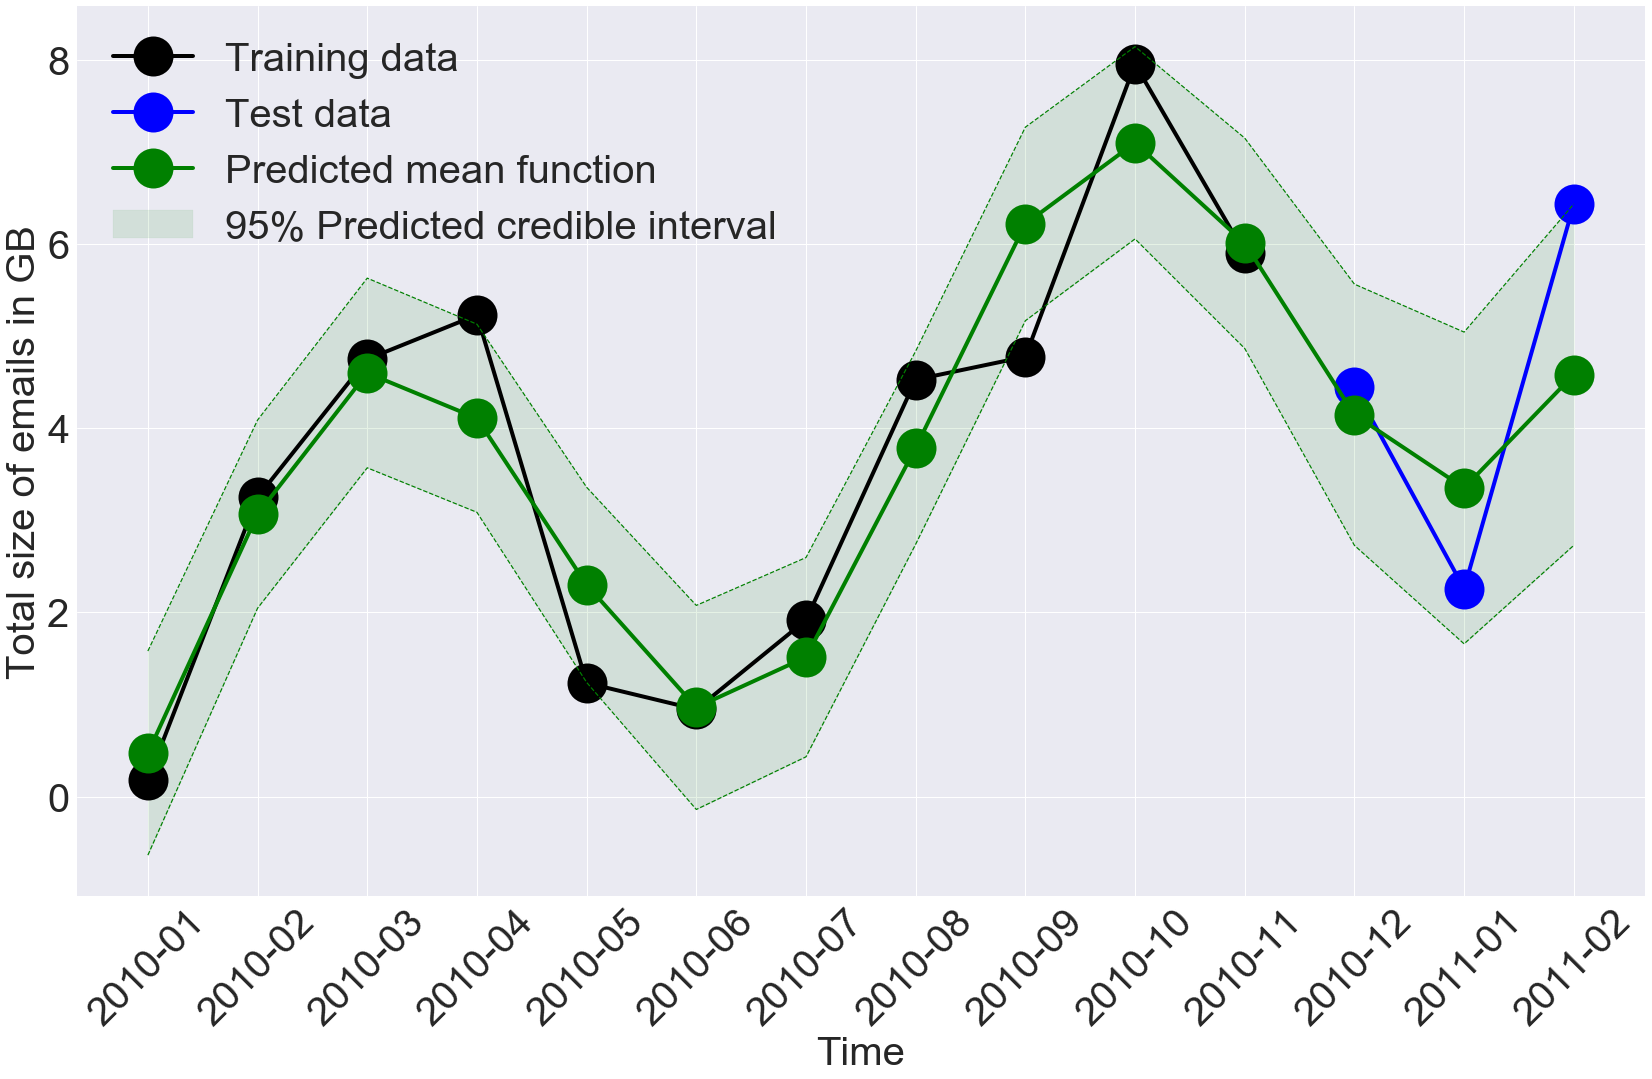

In [14]:
plotprediction(m);

The Figure above shows that the Gaussian process model with a spectral mixture kernel is able to capture the structure both in regions of the training and testing data. The 95% predicted credible interval (CI) contains the "normal" size of email attachments for the duration of the measurements. 

Let's calculate some performance measures such as the Root Mean Square Error (RMSE) and Mean Absolute Performance Error (MAPE).

In [15]:
## Calculate the RMSE and MAPE
def calculate_rmse(model, X_test, Y_test):
    mu, var = model.predict_y(X_test)
    rmse = np.sqrt(((mu - Y_test)**2).mean())
    return rmse

def calculate_mape(model, X_test, Y_test):
    mu, var = model.predict_y(X_test)
    mape = (np.absolute(((mu - Y_test)/Y_test)*100)).mean()
    return mape

In [16]:
calculate_rmse(model=m, X_test = X_test, Y_test = Y_test)
calculate_mape(model=m, X_test = X_test, Y_test = Y_test)

1.2515806168637664

27.94536660649003

Let's estimate an ARIMA model was estimated using the `statsmodels` package for comparison.

In [17]:
import itertools
import numpy.ma as ma
import warnings
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError


def get_ARIMA_param_values(y):
    """ Get best ARIMA values given data
    """
    warnings.filterwarnings('ignore')
    
    # Values to try
    p = [0, 1, 2, 3, 4, 5, 6]
    d = [0, 1, 2]
    q = [0, 1, 2, 3, 4, 5, 6]
    results = []

    for pi, di, qi in itertools.product(p, d, q):
        try:
            model = ARIMA(y, order=(pi, di, qi))
            model_fit = model.fit()
            aic = model_fit.aic
            if not np.isnan(aic):
                results.append(((pi,di,qi), aic, model_fit))
        except ValueError:
            pass
        except LinAlgError:
            pass
    warnings.filterwarnings('default')
    return sorted(results, key=lambda x: x[1])[0]

/Users/demaasit/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
# Make prediction
steps = X_test.shape[0]
params, aic, model_fit = get_ARIMA_param_values(y = Y_train)
mu, stderr, conf_int = model_fit.forecast(steps = steps, alpha=0.05)
params, aic, mu, stderr, conf_int

((0, 1, 0),
 47.811434155792767,
 array([ 6.475238,  7.047388,  7.619538]),
 array([ 2.16329641,  3.05936312,  3.7469393 ]),
 array([[  2.23525495,  10.71522105],
        [  1.05114646,  13.04362954],
        [  0.27567193,  14.96340407]]))

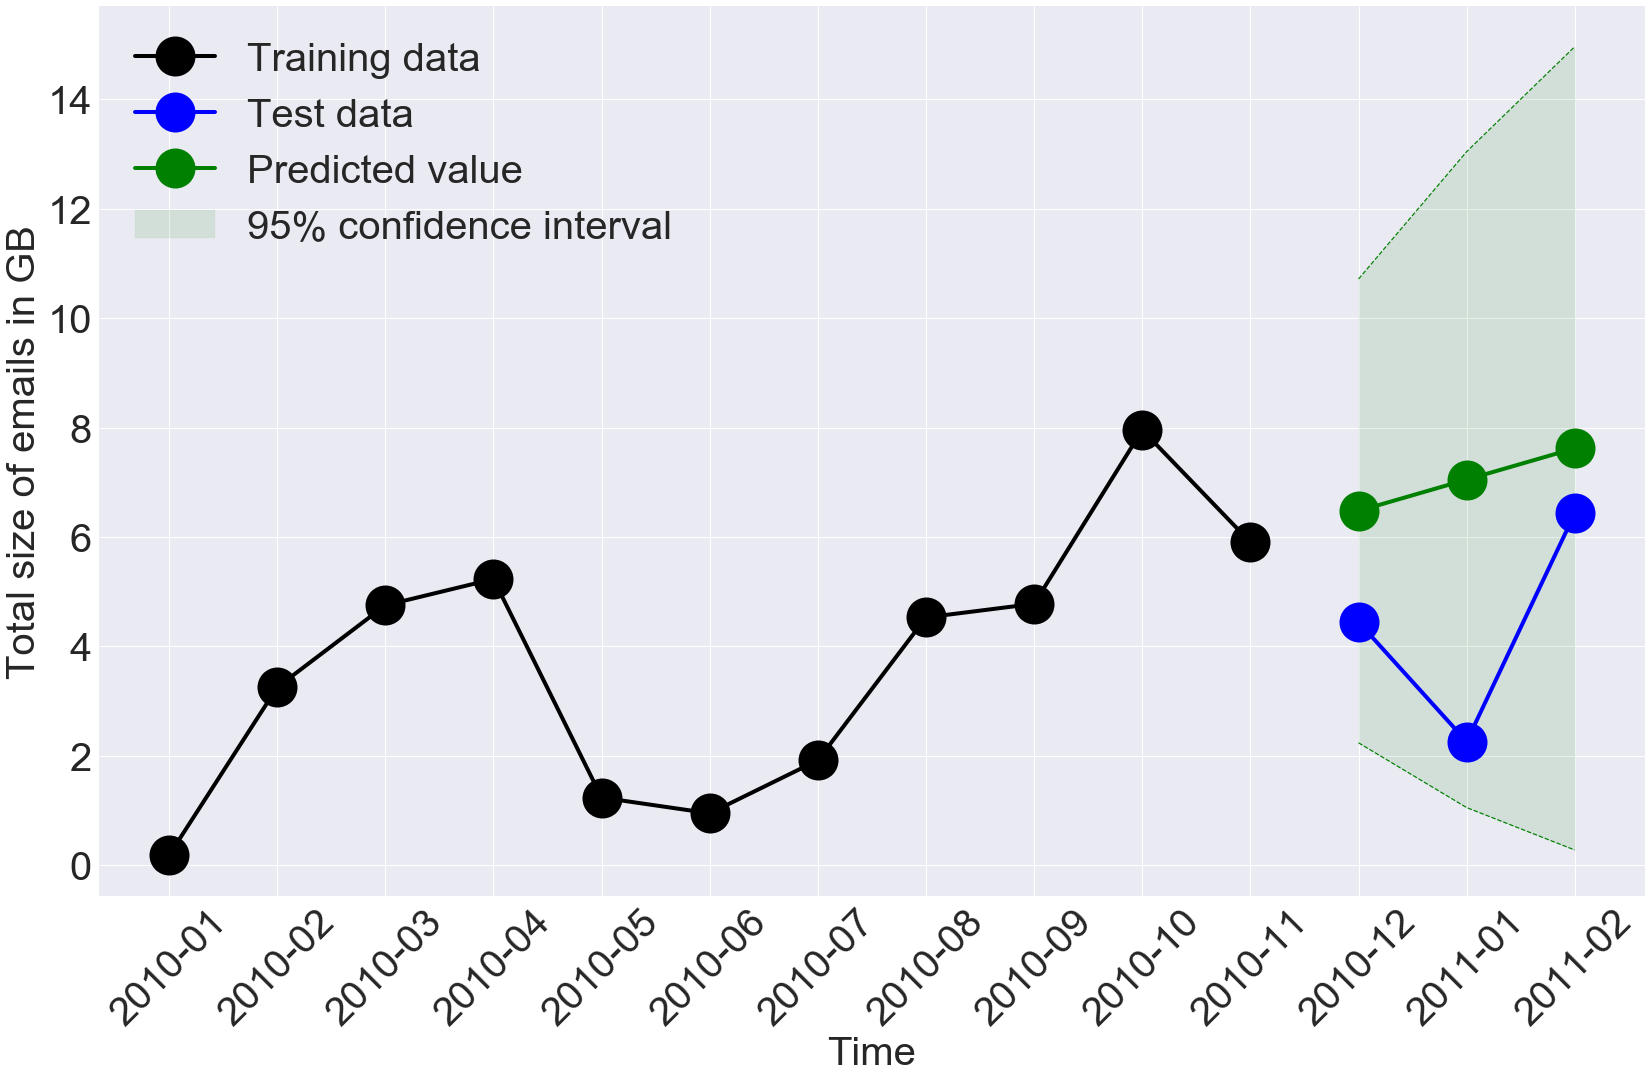

In [19]:
def plotprediction_arima(m):
    mu, stderr, conf_int = m.forecast(steps=steps, alpha=0.05)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticks(ticks = df.index)
    ax.set_xticklabels(labels = df.ds, rotation = 45)
    ax.set_xlabel("Time")
    ax.set_ylabel("Total size of emails in GB");
    ax.plot(X_train.flatten(), Y_train.flatten(), c='k', marker = "o", label = 'Training data')
    ax.plot(X_test.flatten(), Y_test.flatten(), c='b', marker = "o", label = 'Test data')
    ax.plot(X_test.flatten(), mu.flatten(), c='g', marker = "o", label = "Predicted value")
    lower = conf_int[:,0 ]
    upper = conf_int[:,1 ]
    ax.plot(X_test, upper, 'g--', X_test, lower, 'g--', lw=1.2)
    ax.fill_between(X_test.flatten(), lower.flatten(), upper.flatten(),
                    color='g', alpha=.1, label = "95% confidence interval")
    plt.legend(loc = "best")
    plt.tight_layout()

plotprediction_arima(m = model_fit);

The Figure above shows that the ARIMA model is poor at capturing the structure within the region of testing data. This finding suggests that ARIMA models have poor performance for small data without noticeable structure. The 95% confidence interval for ARIMA is much wider than the GP model showing a high degree of uncertainty about the ARIMA predictions. 

Let's calculate some performance measures such as the RMSE and MAPE for the ARIMA model.

In [20]:
## Calculate the RMSE and MAPE
def calculate_rmse_arima(mu, Y_test):
    rmse = np.sqrt(((mu - Y_test)**2).mean())
    return rmse

def calculate_mape_arima(mu, Y_test):
    mape = (np.absolute(((mu - Y_test)/Y_test)*100)).mean()
    return mape

In [21]:
calculate_rmse_arima(mu = mu, Y_test = Y_test)
calculate_mape_arima(mu = mu, Y_test = Y_test)

3.2019469508164868

93.44165723388285

The ARIMA model has a poor predictive performance compared to the Gaussian process model with a spectral mixture kernel

## Conclusions

This study proposed a Bayesian nonparametric framework to capture implicitly hidden structure in time-series having limited data. The proposed framework, a Gaussian process with a spectral mixture kernel, was applied to time-series process for insider-threat data. The proposed framework addresses two current challenges when analyzing quite noisy time-series having limited data whereby the time series are visualized for noticeable structure such as periodicity, growing or decreasing trends and hard coding them into pre-specified functional forms. Experiments demonstrated that results from this framework outperform traditional ARIMA when the time series does not have easily noticeable structure and is quite noisy. Future work will involve evaluating the proposed framework on other different types of insider-threat behavior.

## References
1. Emaasit, D. and Johnson, M. (2018). Capturing Structure Implicitly from Noisy Time-Series having Limited Data. arXiv preprint arXiv:1803.05867.

2. Williams, C. K. and Rasmussen, C. E. (2006). Gaussian processes for machine learning. the MIT Press, 2(3):4.

3. Knudde, N., van der Herten, J., Dhaene, T., &amp; Couckuyt, I. (2017). GPflowOpt: A Bayesian Optimization Library using TensorFlow. arXiv preprint arXiv:1711.03845.

4. Wilson, A. G. (2014). Covariance kernels for fast automatic pattern discovery and extrapolation with Gaussian processes. University of Cambridge.

5. Greitzer, F. L. and Ferryman, T. A. (2013). Methods and metrics for evaluating analytic insider threat tools. In Security and Privacy Workshops (SPW), 2013 IEEE, pages 90–97. IEEE.

6. Gheyas, I. A. and Abdallah, A. E. (2016). Detection and prediction of insider threats to cybersecurity: a systematic literature review and meta-analysis. Big Data Analytics, 1(1):6.

7. Veeramisti, N. K. (2016). A business intelligence framework for network-level traffic safety analyses. PhD thesis, University of Nevada, Las Vegas.

## Computing Environment

In [22]:
# print system information/setup
%reload_ext watermark
%watermark -v -m -p numpy,pandas,gpflowopt,gpflow,tensorflow,matplotlib,ipywidgets,seaborn -g

CPython 3.6.3
IPython 6.2.1

numpy 1.13.3
pandas 0.20.3
gpflowopt 0.1.0
gpflow 0.4.0
tensorflow 1.4.1
matplotlib 2.1.1
ipywidgets 7.1.1
seaborn 0.8.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : df453b6da183c9f8fd941eaa1696e68f9731c771
